<a href="https://colab.research.google.com/github/swilsonmfc/nlp/blob/master/NLPWord2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vec
![alt text](https://www.ed.ac.uk/files/styles/landscape_breakpoints_theme_uoe_mobile_1x/public/thumbnails/image/diagram-20190710.png?itok=2WZA_Q5G)

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import nltk
from nltk.corpus import brown

import gensim
import gensim.downloader as api
from gensim import corpora
from gensim.models.word2vec import Word2Vec
from gensim.models.word2vec import BrownCorpus
from gensim.models.word2vec import Text8Corpus
from gensim.models import FastText

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as K

from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import LSTM

from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='gensim')
warnings.filterwarnings(action='ignore', category=UserWarning, module='smart_open')

# Word Vectors


## Training
* http://mattmahoney.net/dc/textdata.html
* Training time can be significant depending on size

In [227]:
corpus = api.load('text8')  
model = Word2Vec(corpus)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## Word Vector
* A word represented in vector space
* Feature Extraction
* Synonyms
* Compression / Dimensionality Reduction over OHE
* Inputs to Neural Network

In [228]:
model.wv.word_vec('virus')

array([-2.4080207 , -1.0395763 , -0.7135606 , -0.37188014, -0.96751606,
       -0.01468725,  0.21536088, -2.0003915 , -0.6006364 ,  0.59724116,
        0.96112955, -2.0617826 , -0.2549099 , -0.42531288, -0.15461849,
       -0.9498539 , -1.7507107 , -1.223472  , -0.44145644, -0.78241944,
       -0.23322897, -0.5937527 , -0.02292824,  0.3214928 ,  0.4898421 ,
       -0.24379008,  0.20622273, -0.76726556,  0.1160971 , -0.16946697,
        0.7982875 ,  0.21153867, -0.895255  ,  1.8148847 , -0.679964  ,
       -0.03285448,  0.56893   ,  0.03300843, -0.38285106, -0.9077875 ,
       -1.4649669 ,  2.6878734 , -1.6149138 , -1.8937304 , -0.2662802 ,
        0.8475861 , -0.07011241, -1.7100506 ,  1.458781  , -1.2715473 ,
        1.4081233 , -0.3332512 ,  2.7273064 ,  0.17101087,  0.5699603 ,
       -0.25514877, -0.05968575,  0.19803265,  0.2701553 ,  1.1600546 ,
        1.7650723 , -0.6235442 , -1.5647223 ,  2.1319447 ,  0.6126159 ,
       -0.6360212 ,  1.5377322 ,  0.730926  , -0.43580782,  2.30

## Similarity

In [229]:
pd.DataFrame(model.wv.most_similar("cool"), columns=['Token', 'Score'])

,Token,Score
0,warm,0.859840
1,hot,0.845818
2,wet,0.844188
3,dry,0.830109
4,damp,0.778937
5,cloudy,0.762024
6,melt,0.753131
7,snow,0.751582
8,summers,0.751509
9,humid,0.731444


## Vector Math

In [230]:
result = model.wv.most_similar(positive=['king', 'woman'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.6777


In [231]:
result = model.wv.most_similar(positive=['berlin', 'france'], negative=['germany'])
print("{}: {:.4f}".format(*result[0]))

paris: 0.7846


In [232]:
result = model.wv.most_similar(positive=['swim', 'playing'], negative=['play'])
print("{}: {:.4f}".format(*result[0]))

swimming: 0.6712


In [257]:
result = model.wv.most_similar(positive=['summer', 'snow'], negative=['hot'])
print("{}: {:.4f}".format(*result[0]))

winter: 0.7635


In [234]:
result = model.wv.most_similar(positive=['party', 'quiet'], negative=['loud'])
print("{}: {:.4f}".format(*result[0]))

presidency: 0.6378


## Odd Out

In [235]:
model.wv.doesnt_match(['job', 'work', 'career', 'vacation'])

'vacation'

## PCA (Plotting)

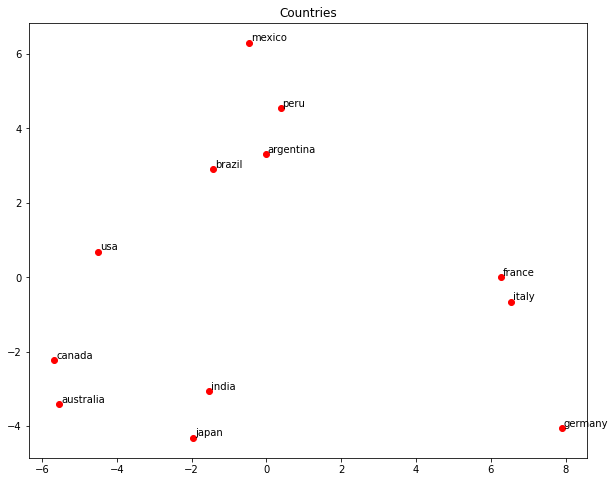

In [236]:
def plot_pca(model, words=None, sample=0):
    word_vectors = np.array([model.wv[w] for w in words])
    pca = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10, 8))
    plt.scatter(pca[:,0], pca[:,1], color='red')
    for word, (x,y) in zip(words, pca):
        plt.text(x + 0.05, y + 0.05, word)


plot_pca(model, ['france', 'germany', 'italy', 
                 'japan', 'australia', 'india',
                 'canada', 'usa', 'mexico', 
                 'brazil', 'peru', 'argentina'])
plt.title('Countries');

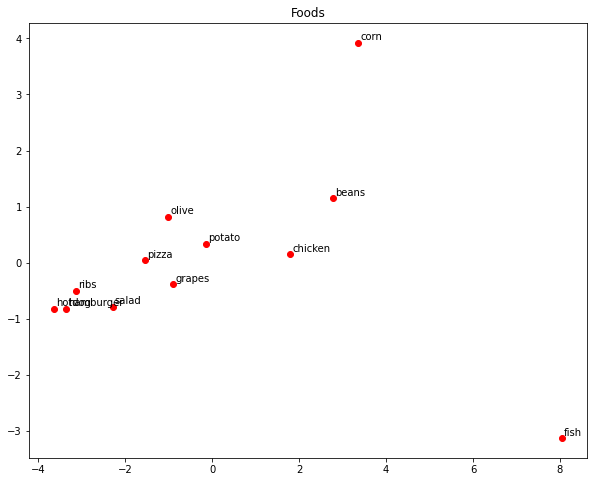

In [237]:
plot_pca(model, ['hamburger', 'hotdog', 'ribs',
                 'salad', 'beans', 'potato',
                 'fish', 'chicken', 'pizza',
                 'grapes', 'corn', 'olive'])
plt.title('Foods');

![alt text](https://github.com/swilsonmfc/nlp/raw/master/Word2Vec/images/Cosine.png)

## Euclidean Distance
* Straight line distance

![alt text](http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/sphilip/images/euclid_eqn.gif)

## Cosine Similarity
* Measures similarity between two items independent of their size
* Measures the cosine of the angle between two vectors

![alt text](https://i.stack.imgur.com/36r1U.png)


# Architecture
* [Distributed Representations of Words and Phrases and their Compositionality](https://arxiv.org/pdf/1310.4546.pdf)
* [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf)

![alt text](https://www.researchgate.net/profile/Jose_Camacho-Collados/publication/325075918/figure/fig1/AS:625045625909251@1526033898828/Learning-architecture-of-the-CBOW-and-Skip-gram-models-of-Word2vec-Mikolov-et-al.png)

# SkipGram
* Predict the surrounding words given the context word

![SkipGram](https://github.com/swilsonmfc/nlp/raw/master/Word2Vec/images/SkipGram.png)

## Model
* We train the output, but drop it
* We want the hidden layer (it's the embeddings)

![alt text](https://qph.fs.quoracdn.net/main-qimg-3d6674075cc56348c2716326e370d50d)

## Challenges
* Memory challenges
  * 10,000 word vocabulary
  * 300 hidden layer / embedding size
  * 10,000 * 300 = 3,000,000 weights
  * Times 2 
    * Hidden layer
    * Output layer
* Softmax computation is slow
* Need many examples to prevent overfit

## Subsample Frequent Words
* Each time we see a word, there's a chance we'll drop the word (and it's training examples)
* The rate is based on frequency and a sampling rate

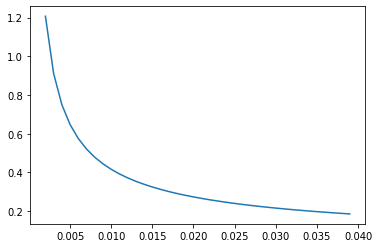

In [222]:
sample = 0.001
def subsample(frac):
  return (math.sqrt(frac / sample) + 1) * (sample / frac)

x, y = [], []
for rate in np.arange(0.002, 0.04, 0.001):
  x.append(rate)
  y.append(subsample(rate))
plt.plot(x, y)

In [254]:
model.wv.index2entity[:25]

['the',
 'of',
 'and',
 'one',
 'in',
 'a',
 'to',
 'zero',
 'nine',
 'two',
 'is',
 'as',
 'eight',
 'for',
 's',
 'five',
 'three',
 'was',
 'by',
 'that',
 'four',
 'six',
 'seven',
 'with',
 'on']

## Weighting Context Position
* Each time we slide the window randomly select a window size from [1, Window]
* All window sizes are equally likely
* This has the effect of reducing further away from the context word

In [218]:
positions = {}

# Brute force :)
for window in [2, 5]:
  position = [0] * window
  for rand in range(1, window + 1):
    for it in range(rand):
      position[rand - 1] += 1
  position = [p * 100 / len(position) for p in position] 
  positions[window] = position

positions

for key, value in positions.items():
  print(f'Window Size {key}')
  
  counter = len(value)
  for i in value:
    print(f'  n-{counter} :  {i:.2f}%')
    counter += -1

  print(f'   X ')
  
  counter = 1
  for i in value[::-1]:
    print(f'  n+{counter} :  {i:.2f}%')
    counter += 1

Window Size 2
  n-2 :  50.00%
  n-1 :  100.00%
   X 
  n+1 :  100.00%
  n+2 :  50.00%
Window Size 5
  n-5 :  20.00%
  n-4 :  40.00%
  n-3 :  60.00%
  n-2 :  80.00%
  n-1 :  100.00%
   X 
  n+1 :  100.00%
  n+2 :  80.00%
  n+3 :  60.00%
  n+4 :  40.00%
  n+5 :  20.00%


## Negative Sampling
* Rather than making small weight adjustments for each training example modify only a small percentage
* Pick small number of negative words 
  * In our training setup, a positive example has a label of 1
  * Our negative samples have a label of zero
  * Randomly pick negative samples:
    * 5-20 Small Dataset
    * 2-5 Large Dataset
    * Use likelihood of a word count raised to the 3/4 power

![alt text](https://cdn-images-1.medium.com/max/1000/1*AH2nhhgon6ca8d_6TflGEA.png)





# Continuous Bag of Words
* The opposite of a SkipGram
* Given the surrounding words predict the context word

![alt text](https://github.com/swilsonmfc/nlp/raw/master/Word2Vec/images/CBOW.png)

## Model

![alt text](https://ruder.io/content/images/2016/04/nn_language_model-1.jpg)

## Hierarchical Softmax
* Can speed up training 25-50X with small accuracy loss (Sebastian Ruder)
* Negative samples are predetermined using a Huffman encoding
* Huffman encoding models the data into a binary tree structure where:
  * Frequent items are stored closer the root
  * Infrequent terms are stored deeper
  * Traversing child nodes provides the negative samples
* Hierarchical Softmax 
  * Think tree where each leaf is a class of softmax
  * Avoid computing the probability distribution over all classes 
  * Instead compute the probability of a single given class given an input vector
* Huffman Post: http://www.trevorsimonton.com/blog/2016/12/15/huffman-tree-in-word2vec.html
* Hierarchical Softmax https://www.youtube.com/watch?v=B95LTf2rVWM
* Great post from Sebastian Ruder on implementing Word Embeddings and SoftMax https://ruder.io/word-embeddings-softmax/

![alt text](http://www.trevorsimonton.com/assets/posts/hufftree/out.png)

# Comparison
* SkipGram
  * Smaller training data (generates more examples)
  * Better with rare words
  * Slower training time (window size affects number of examples)
* CBOW
  * Larger training data
  * Better with frequent words
  * Better with syntax (play, plays, playing)



# Gensim
* Open source project from RaRe Technologies (https://radimrehurek.com/gensim/)
* Brown Corpus (https://en.wikipedia.org/wiki/Brown_Corpus)
* Efficient at building word2vec models
* Training options:
  * min_count : minimum frequency to be included (default 5)
  * size : number of dimensions in the embedding
  * workers : parallelization (only if you have installed Cython)

In [258]:
brown = nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [259]:
nltk.corpus.brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [260]:
nltk.corpus.brown.sents()[100]

['Daniel',
 'personally',
 'led',
 'the',
 'fight',
 'for',
 'the',
 'measure',
 ',',
 'which',
 'he',
 'had',
 'watered',
 'down',
 'considerably',
 'since',
 'its',
 'rejection',
 'by',
 'two',
 'previous',
 'Legislatures',
 ',',
 'in',
 'a',
 'public',
 'hearing',
 'before',
 'the',
 'House',
 'Committee',
 'on',
 'Revenue',
 'and',
 'Taxation',
 '.']

In [0]:
brown_model = Word2Vec(BrownCorpus('/root/nltk_data/corpora/brown/'))

In [261]:
print(f'Size {len(brown_model.wv.vocab)}')

Size 15079


# Applications

## Transfer Learning
  * Download pretrained models
  * Trained over large but different corpora
  * Different embedding sizes
  * https://radimrehurek.com/gensim/auto_examples/howtos/run_downloader_api.html
  * https://github.com/RaRe-Technologies/gensim-data



In [4]:
info = api.info()
pd.DataFrame(info)

,corpora,models
semeval-2016-2017-task3-subtaskBC,"{'num_records': -1, 'record_format': 'dict', '...",NaN
semeval-2016-2017-task3-subtaskA-unannotated,"{'num_records': 189941, 'record_format': 'dict...",NaN
patent-2017,"{'num_records': 353197, 'record_format': 'dict...",NaN
quora-duplicate-questions,"{'num_records': 404290, 'record_format': 'dict...",NaN
wiki-english-20171001,"{'num_records': 4924894, 'record_format': 'dic...",NaN
text8,"{'num_records': 1701, 'record_format': 'list o...",NaN
fake-news,"{'num_records': 12999, 'record_format': 'dict'...",NaN
20-newsgroups,"{'num_records': 18846, 'record_format': 'dict'...",NaN
__testing_matrix-synopsis,{'description': '[THIS IS ONLY FOR TESTING] Sy...,NaN
__testing_multipart-matrix-synopsis,{'description': '[THIS IS ONLY FOR TESTING] Sy...,NaN


## Embeddings
* Rather than words as OHE which have no relationships
* Use embedding before processing text through a RNN
  * Lookup embedding of word
  * Pass embedding into models


In [0]:
VOCAB_SIZE = 10000
EMBED_SIZE = 100
MAX_LENGTH = 50

lang_model = Sequential()
lang_model.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=MAX_LENGTH))
lang_model.add(LSTM(units=32))
lang_model.add(Dense(1, activation='sigmoid'))

lang_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
lang_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 100)           1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                17024     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,017,057
Trainable params: 1,017,057
Non-trainable params: 0
_________________________________________________________________


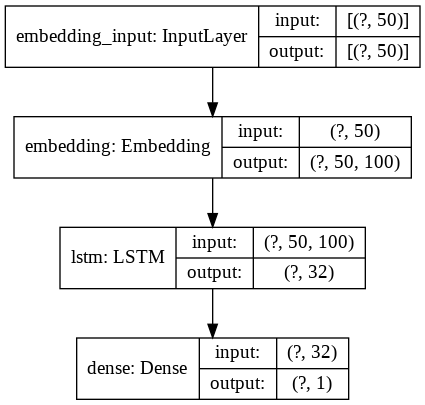

In [8]:
tf.keras.utils.plot_model(lang_model, show_shapes=True)

## *2Vec
* Treat any sequence of data as a "Word2Vec" by training a CBOW or SkipGram model
  * (Batter/Pitcher)2Vec http://www.sloansportsconference.com/wp-content/uploads/2018/02/1008.pdf
  * Molecules mol2vec https://github.com/samoturk/mol2vec
  * DNA dna2Vec https://arxiv.org/pdf/1701.06279.pdf